## Install Dependencies and Setup

In [131]:
import tensorflow as tf
import os

In [132]:
os.chdir(r"C:\Users\Codenester\Desktop")

In [133]:
# Limit our memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

## Remove dodgy images

In [134]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [135]:
data_dir = 'CNN'

In [136]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [137]:
img = cv2.imread(os.path.join('CNN',"happy",'dv2051009.jpg'))
img.shape

(3621, 4828, 3)

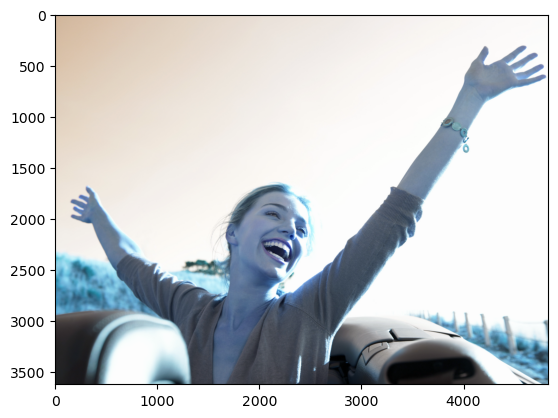

In [138]:
plt.imshow(img)

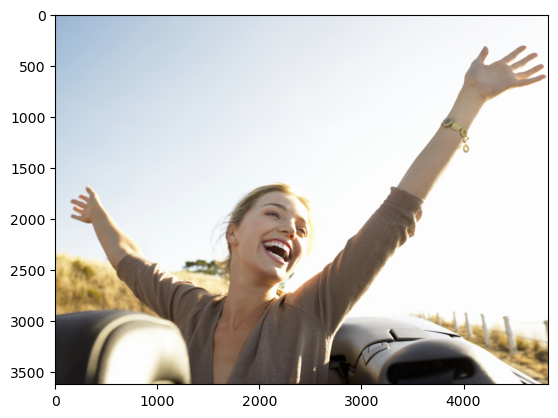

In [139]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [140]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('issue with image {}'.format(image_path))

## Load Data

In [141]:
#tf.data.Dataset??

In [142]:
import numpy as np

In [143]:
#tf.keras.utils.image_dataset_from_directory

In [144]:
data = tf.keras.utils.image_dataset_from_directory('CNN')

Found 151 files belonging to 2 classes.


In [145]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [146]:
# get another batch from iterator
batch = data_iterator.next()

In [147]:
len(batch)

2

In [148]:
# Images represent as numpy array
batch[0]

array([[[[141.        ,  79.        ,  80.        ],
         [142.        ,  80.        ,  81.        ],
         [141.41888   ,  79.41889   ,  80.41889   ],
         ...,
         [ 98.        ,  78.        ,  67.        ],
         [ 96.        ,  76.        ,  65.        ],
         [ 93.093544  ,  73.093544  ,  62.093544  ]],

        [[141.42969   ,  79.42969   ,  80.42969   ],
         [141.21484   ,  79.21484   ,  80.21484   ],
         [140.38199   ,  78.381996  ,  79.381996  ],
         ...,
         [ 98.78516   ,  78.78516   ,  67.78516   ],
         [ 95.94326   ,  75.94326   ,  64.94326   ],
         [ 94.93421   ,  74.93421   ,  63.93421   ]],

        [[142.        ,  80.        ,  81.        ],
         [141.        ,  79.        ,  80.        ],
         [141.21289   ,  79.21289   ,  80.21289   ],
         ...,
         [ 99.        ,  79.        ,  68.        ],
         [ 97.        ,  77.        ,  66.        ],
         [ 97.44428   ,  77.44428   ,  66.44428   ]],

In [149]:
batch[0].shape

(32, 256, 256, 3)

In [150]:
# Image Labled as 0=happy or 1=sad
batch[1]

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1])

## Scale Data

In [151]:
# Scaled data by dividing 255(RGB color 0 to 255)
scaled = batch[0]/255

In [152]:
scaled.min()

0.0

In [153]:
scaled.max()

1.0

In [154]:
data = data.map(lambda x,y: (x/255,y))

In [155]:
data.as_numpy_iterator().next()

(array([[[[0.38627452, 0.5117647 , 0.6098039 ],
          [0.38308823, 0.5085784 , 0.6066176 ],
          [0.3882353 , 0.5137255 , 0.6117647 ],
          ...,
          [0.3372549 , 0.45882353, 0.5372549 ],
          [0.33578432, 0.44558823, 0.52794117],
          [0.32107842, 0.44264707, 0.5210784 ]],
 
         [[0.36862746, 0.49411765, 0.5921569 ],
          [0.37132353, 0.4968137 , 0.5948529 ],
          [0.3764706 , 0.5019608 , 0.6       ],
          ...,
          [0.33333334, 0.45490196, 0.53333336],
          [0.32794118, 0.4495098 , 0.52794117],
          [0.32941177, 0.4509804 , 0.5294118 ]],
 
         [[0.37254903, 0.49019608, 0.5921569 ],
          [0.37156862, 0.48921567, 0.59117645],
          [0.3647059 , 0.49019608, 0.5882353 ],
          ...,
          [0.34509805, 0.4745098 , 0.54901963],
          [0.3389706 , 0.46838236, 0.54289216],
          [0.327451  , 0.45686275, 0.53137255]],
 
         ...,
 
         [[0.01911765, 0.04656863, 0.01519608],
          [0.01446

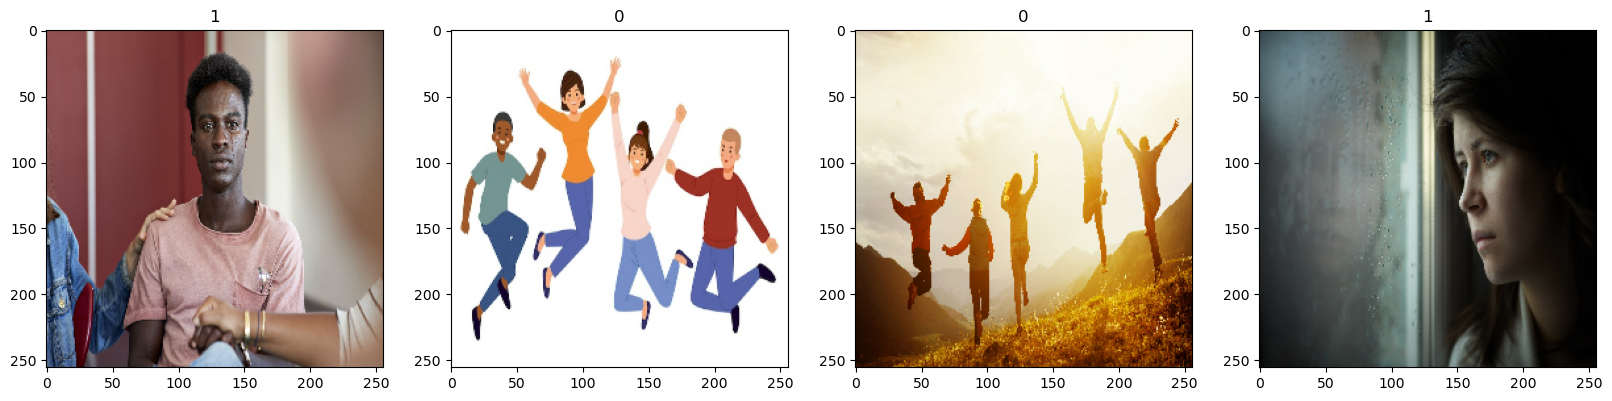

In [156]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Split Data

In [159]:
# lenght of dataset
len(data)

5

In [222]:
# split dataset into train, test and dev
# add +1 to test_size to become = len(data)
train_size = int(len(data)*.7)
dev_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [226]:
 train_size + dev_size + test_size

5

In [227]:
train = data.take(train_size)
dev = data.skip(train_size).take(dev_size)
test = data.skip(train_size + dev_size).take(test_size)

In [231]:
len(test)

1

## Build Deep Learning Model

In [242]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [236]:
model = Sequential()

In [238]:
model.add(Conv2D(16,(3,3),1, activation="ReLU", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation="ReLU"))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation="ReLU"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='ReLU'))
model.add(Dense(1,activation='sigmoid'))

In [240]:
model.compile('Adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [241]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

## Train

In [244]:
os.mkdir(r'CNN\\logs')

In [246]:
logdir='logs'

In [247]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [249]:
hist = model.fit(train, epochs=20, validation_data=dev, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 3s 580ms/step - loss: 0.6829 - accuracy: 0.6042 - val_loss: 0.7092 - val_accuracy: 0.4062
Epoch 2/20
3/3 [==============================] - 2s 568ms/step - loss: 0.6620 - accuracy: 0.6250 - val_loss: 0.6689 - val_accuracy: 0.5312
Epoch 3/20
3/3 [==============================] - 2s 486ms/step - loss: 0.6704 - accuracy: 0.5417 - val_loss: 0.6277 - val_accuracy: 0.6250
Epoch 4/20
3/3 [==============================] - 2s 509ms/step - loss: 0.6857 - accuracy: 0.6354 - val_loss: 0.6973 - val_accuracy: 0.3750
Epoch 5/20
3/3 [==============================] - 2s 527ms/step - loss: 0.6454 - accuracy: 0.6562 - val_loss: 0.6472 - val_accuracy: 0.5312
Epoch 6/20
3/3 [==============================] - 2s 526ms/step - loss: 0.6211 - accuracy: 0.6042 - val_loss: 0.6318 - val_accuracy: 0.5938
Epoch 7/20
3/3 [==============================] - 2s 611ms/step - loss: 0.6105 - accuracy: 0.7500 - val_loss: 0.5704 - val_accuracy: 0.9062
Epoch 8/20
3/3 [====

In [251]:
# view of history log
hist.history

{'loss': [0.6828965544700623,
  0.661966860294342,
  0.6704204678535461,
  0.6857331395149231,
  0.6453704833984375,
  0.6211274862289429,
  0.6105222702026367,
  0.5503947138786316,
  0.4972943961620331,
  0.4320073127746582,
  0.3803428113460541,
  0.43237337470054626,
  0.3680359125137329,
  0.3061654567718506,
  0.24760186672210693,
  0.24730364978313446,
  0.21862994134426117,
  0.1766689270734787,
  0.17296333611011505,
  0.1335163116455078],
 'accuracy': [0.6041666865348816,
  0.625,
  0.5416666865348816,
  0.6354166865348816,
  0.65625,
  0.6041666865348816,
  0.75,
  0.8645833134651184,
  0.78125,
  0.8125,
  0.8541666865348816,
  0.7708333134651184,
  0.8333333134651184,
  0.90625,
  0.90625,
  0.9375,
  0.9270833134651184,
  0.9375,
  0.9583333134651184,
  0.9791666865348816],
 'val_loss': [0.7091856002807617,
  0.6689241528511047,
  0.6277002096176147,
  0.6972934603691101,
  0.6471713781356812,
  0.6317942142486572,
  0.5704287886619568,
  0.4164232611656189,
  0.410576701

## Plot Performance

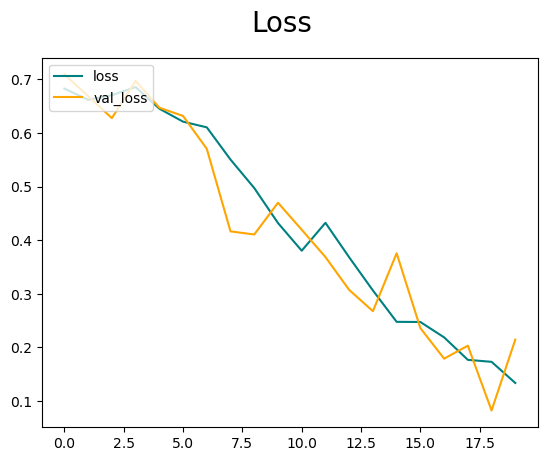

In [254]:
# visualise data via plot
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

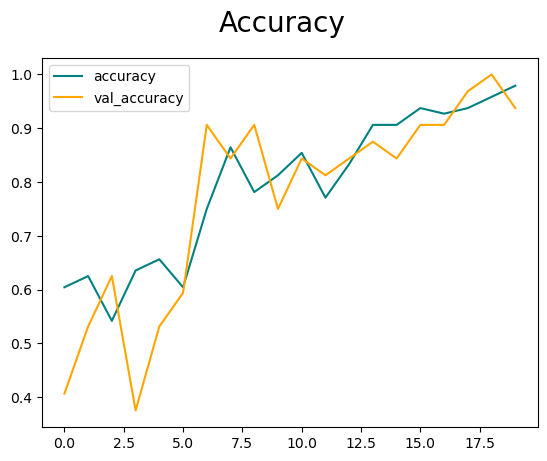

In [257]:
# visualise data via plot
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate

In [271]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [272]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [292]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 110ms/step


In [294]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1.0 0.8333333 0.9130435


## Test

In [302]:
os.mkdir(r"CNN\test")

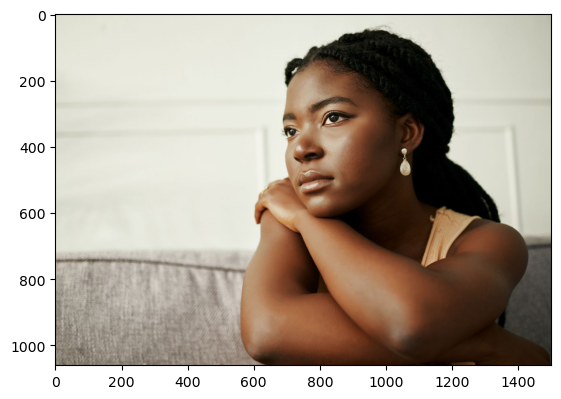

In [365]:
imgp = cv2.imread('sad_test.jpg')
img = cv2.cvtColor(imgp,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

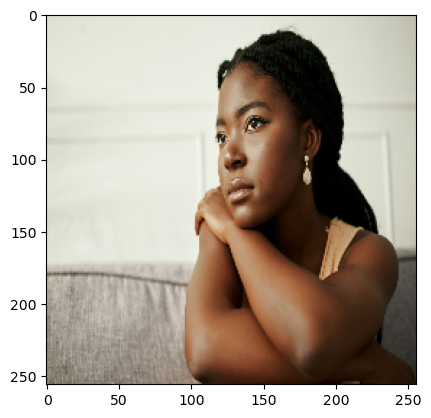

In [366]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [350]:
resize.shape

TensorShape([256, 256, 3])

In [351]:
np.expand_dims(resize/255,0).shape

(1, 256, 256, 3)

In [352]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 7ms/step


In [353]:
yhat

array([[0.27479735]], dtype=float32)

In [360]:
if yhat > 0.5:
    print("Prediction is sad people")
else:
    print('Prediction is happy people')

## Save and Load the Model

In [356]:
model.save(os.path.join('CNN','models', 'happy_sad_model.h5'))

In [357]:
from tensorflow.keras.models import load_model

In [358]:
new_model = load_model(os.path.join('CNN','models','happy_sad_model.h5'))

In [359]:
new_model

In [367]:
yhat_new = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 11ms/step


In [368]:
if yhat_new > 0.5:
    print("Prediction is SAD people")
else:
    print('Prediction is HAPPY people')

Prediction is SAD people
